# Instantons

In [1]:
cd '/home/dpirvu/project/velocityCOM/apples/'

/home/dpirvu/project/velocityCOM/apples


In [2]:
import os,sys
sys.path.remove('/home/dpirvu/DarkPhotonxunWISE/hmvec-master')
sys.path.append('/home/dpirvu/project/velocityCOM/apples/bubbles_codes/')
print(sys.path)

%matplotlib inline

from bubble_tools import *
from experiment import *
from plotting import *

['/home/dpirvu/project/velocityCOM/apples', '/cm/shared/apps/python/python37/lib/python37.zip', '/cm/shared/apps/python/python37/lib/python3.7', '/cm/shared/apps/python/python37/lib/python3.7/lib-dynload', '', '/home/dpirvu/.local/lib/python3.7/site-packages', '/cm/shared/apps/python/python37/lib/python3.7/site-packages', '/cm/shared/apps/python/python37/lib/python3.7/site-packages/IPython/extensions', '/home/dpirvu/.ipython', '/home/dpirvu/project/velocityCOM/apples/bubbles_codes/']


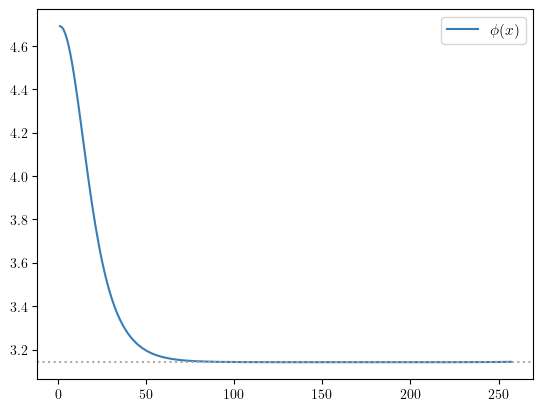

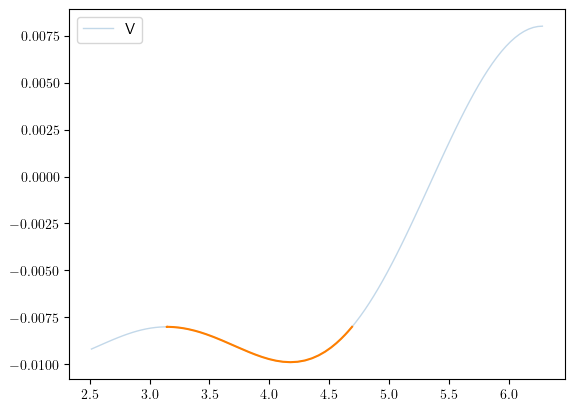

In [8]:
lamb=1.4
def fun(y, x):
    Φ, Π = y
    #dydx = [Π, -Π/x+(np.sin(Φ) + 0.5*lamb**2.*np.sin(2.*Φ))*4.*nu]
    dydx = [Π, +(np.sin(Φ) + 0.5*lamb**2.*np.sin(2.*Φ))*4.*nu]
    return dydx

#y0 = [5.69219082899, 0.] # for the case with friction lambda = 1.5
#y0 = [5.5074571725, 0.] # for the case with friction lambda = 1.4
y0 = [4.69197969032, 0.]

x = np.linspace(1, 257, 257)
xplot = np.linspace(np.pi*0.8, 2.*np.pi, 100)
sol = odeint(fun, y0, x)

VV = lambda x: -(-np.cos(x) + 0.5*lamb**2.*np.sin(x)**2.)*4.*nu

plt.plot(x, sol[:, 0], ls='-', label=r'$\phi(x)$')
#plt.plot(x, instantonList[ii][255:], ls=':', label=r'$\phi(x)$')
plt.axhline(np.pi, ls=':', color='darkgray')
plt.legend(); plt.show()


plt.plot(xplot, VV(xplot), label='V', linewidth='1', alpha=0.3)
plt.plot(sol[:, 0], VV(sol[:, 0]))
plt.legend(); plt.show()

In [9]:
inst1 = sol[:, 0]
inst1 = np.concatenate((inst1[::-1][1:],inst1[1::]))
print(np.shape(inst1))


(512,)


In [6]:
inst2 = sol[:, 0]
inst2 = np.concatenate((inst2[::-1][1:],inst2[1::]))
print(np.shape(inst2))


(512,)


In [29]:
import numpy as np
import matplotlib.pyplot as plt

def multiple_formatter(denominator=4, number=np.pi, latex='\pi'):
    def gcd(a, b):
        while b:
            a, b = b, a%b
        return a
    def _multiple_formatter(x, pos):
        den = denominator
        num = np.int(np.rint(den*x/number))
        com = gcd(num,den)
        (num,den) = (int(num/com),int(den/com))
        if den==1:
            if num==0:
                return r'$0$'
            if num==1:
                return r'$%s$'%latex
            elif num==-1:
                return r'$-%s$'%latex
            else:
                return r'$%s%s$'%(num,latex)
        else:
            if num==1:
                return r'$\frac{%s}{%s}$'%(latex,den)
            elif num==-1:
                return r'$\frac{-%s}{%s}$'%(latex,den)
            else:
                return r'$\frac{%s%s}{%s}$'%(num,latex,den)
    return _multiple_formatter

class Multiple:
    def __init__(self, denominator=4, number=np.pi, latex='\pi'):
        self.denominator = denominator
        self.number = number
        self.latex = latex

    def locator(self):
        return plt.MultipleLocator(self.number / self.denominator)

    def formatter(self):
        return plt.FuncFormatter(multiple_formatter(self.denominator, self.number, self.latex))

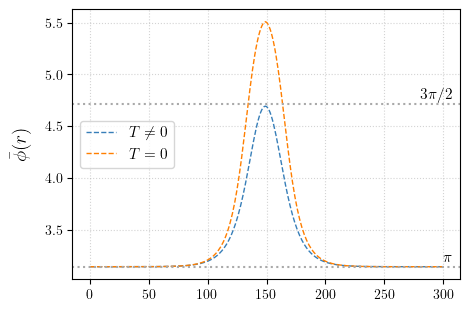

In [48]:
fig, ax = plt.subplots(1, 1, figsize = (5, 3.5))
plt.plot(inst1[len(inst1)//2-150:len(inst1)//2+150], lw=1, ls='--', label=r'$T \neq 0$')
plt.plot(inst2[len(inst1)//2-150:len(inst1)//2+150], lw=1, ls='--', label=r'$T=0$')
ax.axhline(np.pi, ls=':', color='darkgray')
plt.text(300, np.pi+0.05, r'$\pi$')
ax.axhline(3.*np.pi/2., ls=':', color='darkgray')
plt.text(280, 3.*np.pi/2.+0.05, r'$3\pi/2$')
plt.legend(loc='center left')
ax.grid(ls=':', color='darkgray', alpha=0.5)
ax.set_ylabel(r'$\bar{\phi}(r)$')
plt.savefig('./data/predictions.pdf')
plt.show()

tmp = 0
temp=tempList[tmp]
lamb=lambList[tmp]


#np.save(path_inst(nLat, lamb, phi0, temp), inst)

In [5]:
if False:
    def f(x, y):
           return np.sqrt(x**2. + y**2.)
    def fi(x, y):
           return np.sqrt(x**2. - y**2.)

    ii = 2
    tmp = tmpLoaded[ii]; print(tmp)
    instanton = instantonList[tmp]
    temp = tempList[tmp]
    lamb = lambList[tmp]
    rcrit = RcritInst[tmp]

    x = np.linspace(0., len(instanton)//2, 1000)
    t = np.linspace(0., len(instanton)//2, 1000)
    xx, tt = np.meshgrid(x, t)
    zz = f(xx, tt)

    instMesh = np.zeros(np.shape(zz))
    for ti,ts in enumerate(t):
        for xi,xs in enumerate(x):
            try:
                instMesh[xi, ti] = instanton[int(fi(xs, ts))-len(instanton)//2]
            except:
                continue

    walltraj, wallvel = np.zeros(len(t)), np.zeros(len(t))
    for ti,ts in enumerate(t):
        walltraj[ti] = int(f(rcrit, ts))
        wallvel[ti] = (walltraj[ti]**2. - rcrit**2.)**0.5/walltraj[ti]

    fig, ax = plt.subplots(1, 1, figsize = (6, 5))
    exts = [0, len(instanton)//2, 0, len(instanton)//2]
    im = ax.contourf(instMesh.T, aspect='auto', extent=exts, origin='lower')
    plt.plot(walltraj, t, color='r')
    clb = plt.colorbar(im, ax = ax)
    plt.show()

In [7]:
bubbleList, instantonList, tmpLoaded = [], [], []
for tmp, temp in enumerate(tempList):
    lamb     = lambList[tmp]
    sigmafld = fluct_stdev(lamb, phi0, temp)
    pathavbub = average_bubble_file(nLat, lamb, phi0, temp)+'.npy'
    bubbleList.append(np.load(pathavbub))

    instantonList.append(np.load(path_inst(nLat, lamb, phi0, temp)+'.npy'))

    tmpLoaded.append(tmp)

NameError: name 'average_bubble_file' is not defined

In [8]:
def FWHM(X,Y):
    half_max = np.amax(Y)/2.
    #find when function crosses line half_max (when sign of diff flips)
    #take the 'derivative' of signum(half_max - Y[])
    d = (half_max - Y[:-1]) - (half_max - Y[1:])
    plt.plot(X[0:len(d)], d) #if you are interested
    #find the left and right most indexes
    left_idx = np.argwhere(d > 0)[0]; plt.axvline(left_idx, color='r')
    right_idx = np.argwhere(d < 0)[-1]; plt.axvline(right_idx, color='r'); plt.show()
    return X[right_idx] - X[left_idx] #return the difference (full width)

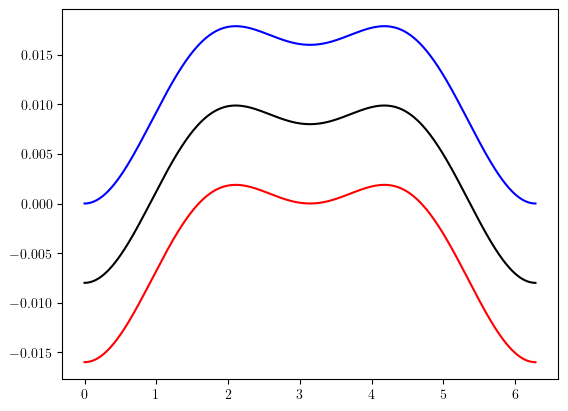

In [9]:
V3 = lambda x, la:  ( -np.cos(x) + 0.5 * la**2. * np.sin(   x)**2.) * 4. * nu

phil = np.linspace(0, 2*np.pi, 1000)
plt.plot(phil, V3(phil, 1.4), color='k')
plt.plot(phil, V3(phil, 1.4) - V3(phieq, 1.4), color='r')
plt.plot(phil, V3(phil, 1.4) - V3(2.*phieq, 1.4), color='b')

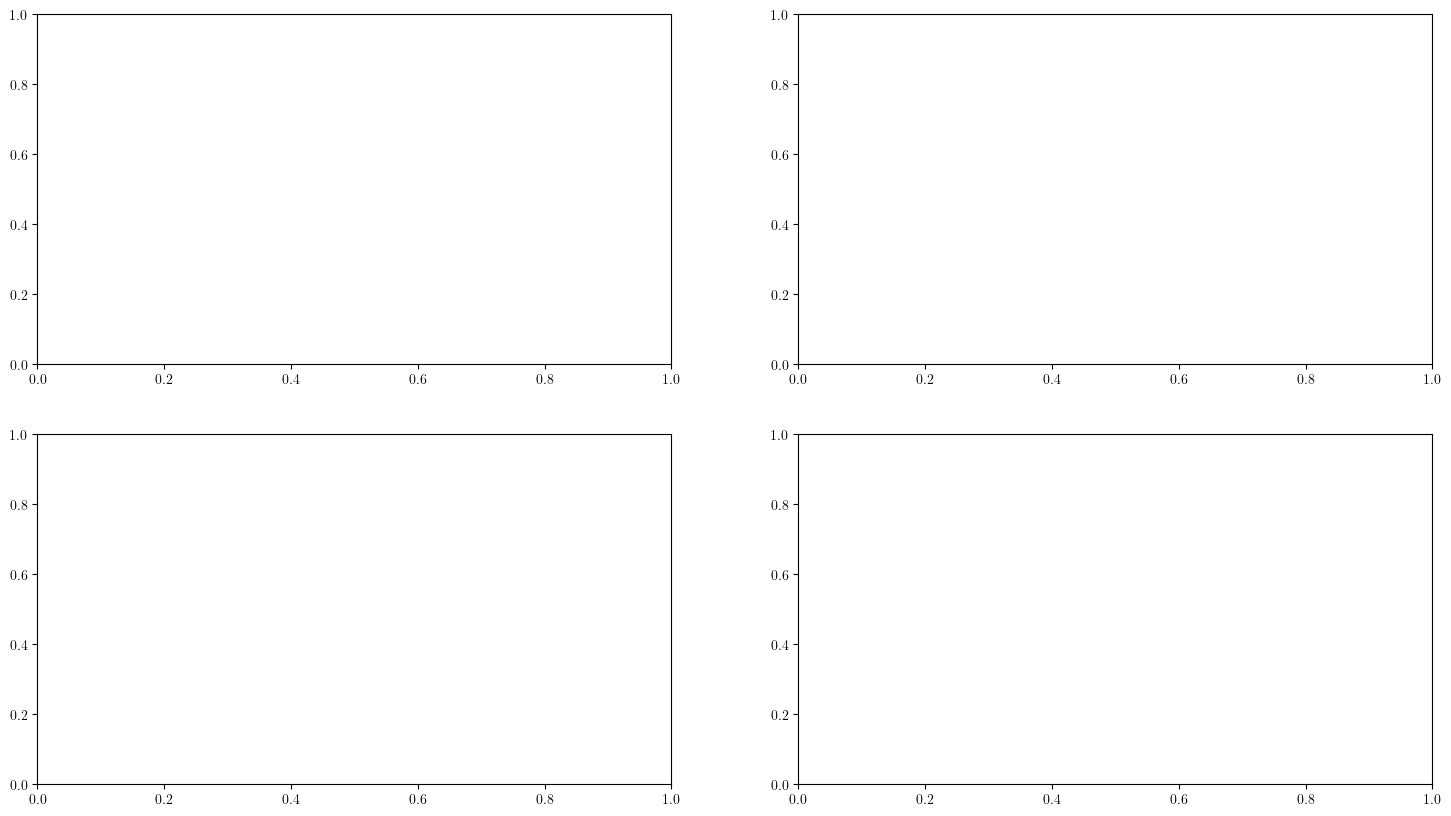

critical radius: []
critical instanton radius: []


In [10]:
RcritList = np.zeros(len(bubbleList))
RcritInst = np.zeros(len(bubbleList))
critSlices = []

fig, ax = plt.subplots(2, 2, figsize = (18, 10))
for ii, average_bubble in enumerate(bubbleList):

    tmp  = tmpLoaded[ii]
    temp = tempList[tmp]
    lamb = lambList[tmp]
    
    bubble2plot = average_bubble[0,:,:330, 150:-150]
    nT,nN = np.shape(bubble2plot[0])

    kinetic    = 0.5*bubble2plot[1]**2.
    gradient   = 0.5*bubble2plot[2]**2.
    potential  = V3(bubble2plot[0], lamb) - V3(2.*phieq, lamb)
    totEbubble = kinetic + gradient + potential

    kinprof   = np.trapz(kinetic, dx=dx, axis=1)
    potenprof = np.trapz(potential, dx=dx, axis=1)
    gradprof  = np.trapz(gradient, dx=dx, axis=1)
    enprof    = np.trapz(totEbubble, dx=dx, axis=1)

    off = 250
    indmin  = np.argmin(kinprof[off:]) + off
    if temp==0: indmin += 7
    if ii == 2: indmin += 0
    if ii == 3: indmin += 0

    slice    = bubble2plot[0,indmin]
    momslice = bubble2plot[1,indmin]
    enslice  = totEbubble[indmin]

    xmax = np.argmax(slice)
    phiprof = bubble2plot[0,:,xmax+1]

    if temp==0:
        enslice = gaussian_filter(enslice, 2, mode='nearest')
        smslice = gaussian_filter(slice, 2, mode='nearest')
    else:
        enslice = enslice
        smslice = slice
    bubbleCoords = smslice>=phieq*1.008
    bubbleCoordsNot = smslice<phieq*1.008

    ensliceBub = enslice*bubbleCoords
    ensliceBub = ensliceBub[np.argwhere(ensliceBub>0)].flatten()
    ensliceBubNot = enslice*bubbleCoordsNot
    ensliceBubNot = ensliceBubNot[np.argwhere(ensliceBubNot>0)].flatten()
    enslice = ensliceBub - np.mean(ensliceBubNot)
    Eemp = np.trapz(ensliceBub, dx=dx)

    np.save(path_indcrit(nLat, lamb, phi0, temp), indmin)
    np.save(path_encrit(nLat, lamb, phi0, temp), Eemp)
    critSlices.append(np.asarray([slice, momslice, enslice]))

    labs = r'$\phi_0=$'+str('%.2f'%phi0)+r', $\lambda=$'+str(lamb)+r', $T=$'+str(temp)
    lsl = ('-' if tmp==1 else '--' if tmp==0 else '-.' if tmp==2 else ':')

    if tmp==2:
        instanton = instantonList[ii]
        instanton = instanton[np.argmax(instanton)-len(slice)//2:np.argmax(instanton)+len(slice)//2]
        ax[1,0].plot(instanton, ls=lsl, label='instanton')
        peaks, _ = find_peaks(instanton)
        ind = np.argmax(instanton[peaks])
        fwhm = peak_widths(instanton, peaks, rel_height=0.5)
        RcritInst[ii] = fwhm[0][ind]/2.
        ax[1,0].plot(peaks, instanton[peaks], "x")
        ax[1,0].hlines(*fwhm[1:], ls=lsl)

    peaks, _ = find_peaks(slice, height=phieq+np.pi/3.)
    ind = np.argmax(slice[peaks[:]])
    fwhm = peak_widths(slice, peaks[[ind]], rel_height=0.5)
    RcritList[ii] = fwhm[0][0]/2.
    ax[1,0].plot(peaks[[ind]], slice[peaks[[ind]]], "x")
    ax[1,0].hlines(*fwhm[1:], ls=lsl)

    ax[0,0].plot(phiprof, ls=lsl, label=labs)
    ax[0,0].axhline(phieq, ls=':', color='darkgray')
    ax[0,0].axhline(2.*np.pi, ls=':', color='darkgray')
    ax[0,0].axvline(indmin, ls=lsl)
    ax[0,1].axvline(indmin, ls=lsl)
    ax[0,1].plot(kinprof, ls=lsl, label=labs)
  #  ax[0,1].plot(momprof, ls=lsl, label=labs)
    ax[1,0].plot(slice, ls=lsl, label=labs)
 #   ax[1,0].plot(smslice, ls=lsl, label=labs)
 #   ax[1,0].plot(potenprof, ls=lsl, label=labs)
 #   ax[1,0].plot(gradprof, ls=lsl, label=labs)
  #  ax[1,1].plot(enprof, ls=lsl, label=labs)
    ax[1,1].plot(enslice, ls=lsl, label=labs)
    
    for aa, axx in enumerate(ax.flatten()):
        axx.set_ylabel([r'$\phi$', 'kinetic', 'Crit slice', 'energy'][aa])
        axx.set_xlabel('t')
        axx.legend()
plt.show()

print('critical radius:', RcritList)
print('critical instanton radius:', RcritInst)

##### 

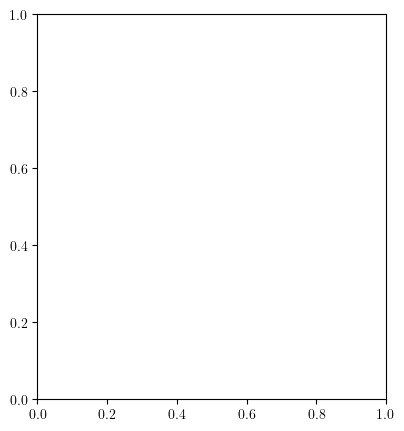

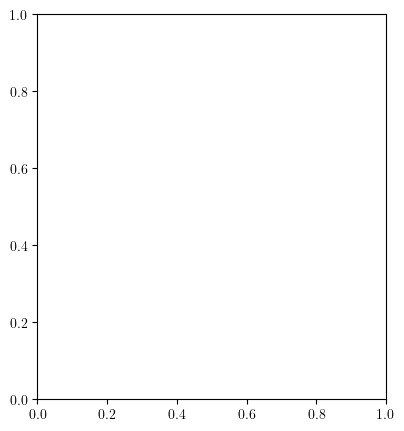

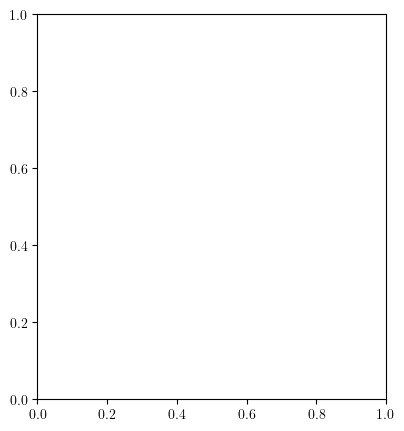

In [11]:
fig, ax = plt.subplots(1, 1, figsize = (4.5, 5))
for ii, average_bubble in enumerate(bubbleList):
    tmp = tmpLoaded[ii]
    if tmp==0: continue
    temp = tempList[tmp]
    lamb = lambList[tmp]
    indmin = int(np.load(path_indcrit(nLat, lamb, phi0, temp)+'.npy'))

   # labs = r'$\phi_0=$'+str('%.2f'%phi0)+r', $\lambda=$'+str(lamb)+r', $T=$'+str(temp)
    labs = r'$T= $'+str(temp)

    xcut = 200
    slice = average_bubble[0,0,indmin,xcut:-xcut]
    if tmp==2:
        instanton = instantonList[ii]
        instanton = instanton[np.argmax(instanton)-len(slice)//2:np.argmax(instanton)+len(slice)//2]
        ax.plot(instanton, ls='--', label='instanton')

    ax.plot(slice, ls='-', label=labs)
    ax.set_ylabel(r'$\bar{\phi}(r)$')
    ax.set_xlabel(r'$\phi_0^{-1} \sqrt{V_0} \; r$')
    ax.yaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
    ax.axes.get_xaxis().set_visible(False)
    ax.axhline(np.pi, ls=':', color='darkgray')
    ax.grid(ls=':', color='darkgray', alpha=0.5)
    ax.legend()
plt.savefig('./data/comparison_thermal_critprofiles.pdf',bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(1, 1, figsize = (4.5, 5))
for ii, average_bubble in enumerate(bubbleList):
    tmp = tmpLoaded[ii]
    if tmp!=0 and tmp!=1: continue
    temp = tempList[tmp]
    lamb = lambList[tmp]
    indmin = int(np.load(path_indcrit(nLat, lamb, phi0, temp)+'.npy'))

   # labs = r'$\phi_0=$'+str('%.2f'%phi0)+r', $\lambda=$'+str(lamb)+r', $T=$'+str(temp)
    labs = r'$T= $'+str(temp)

    slice = average_bubble[0,0,indmin,xcut:-xcut]
    ax.plot(slice, ls='-', label=labs)
    ax.set_ylabel(r'$\bar{\phi}(r)$')
    ax.set_xlabel(r'$\phi_0^{-1} \sqrt{V_0} \; r$')
    ax.yaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
    ax.axes.get_xaxis().set_visible(False)
    ax.axhline(np.pi, ls=':', color='darkgray')
    ax.grid(ls=':', color='darkgray', alpha=0.5)
    ax.legend()
plt.show()

fig, ax = plt.subplots(1, 1, figsize = (4.5, 5))
for ii, average_bubble in enumerate(bubbleList):
    tmp = tmpLoaded[ii]
    if tmp!=1 and tmp!=2: continue
    temp = tempList[tmp]
    lamb = lambList[tmp]
    indmin = int(np.load(path_indcrit(nLat, lamb, phi0, temp)+'.npy'))

   # labs = r'$\phi_0=$'+str('%.2f'%phi0)+r', $\lambda=$'+str(lamb)+r', $T=$'+str(temp)
    labs = r'$T= $'+str(temp)

    slice = average_bubble[0,0,indmin,xcut:-xcut]
    ax.plot(slice, ls='-', label=labs)
    ax.set_ylabel(r'$\bar{\phi}(r)$')
    ax.set_xlabel(r'$\phi_0^{-1} \sqrt{V_0} \; r$')
    ax.yaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
    ax.axes.get_xaxis().set_visible(False)
    ax.axhline(np.pi, ls=':', color='darkgray')
    ax.grid(ls=':', color='darkgray', alpha=0.5)
    ax.legend()
plt.show()


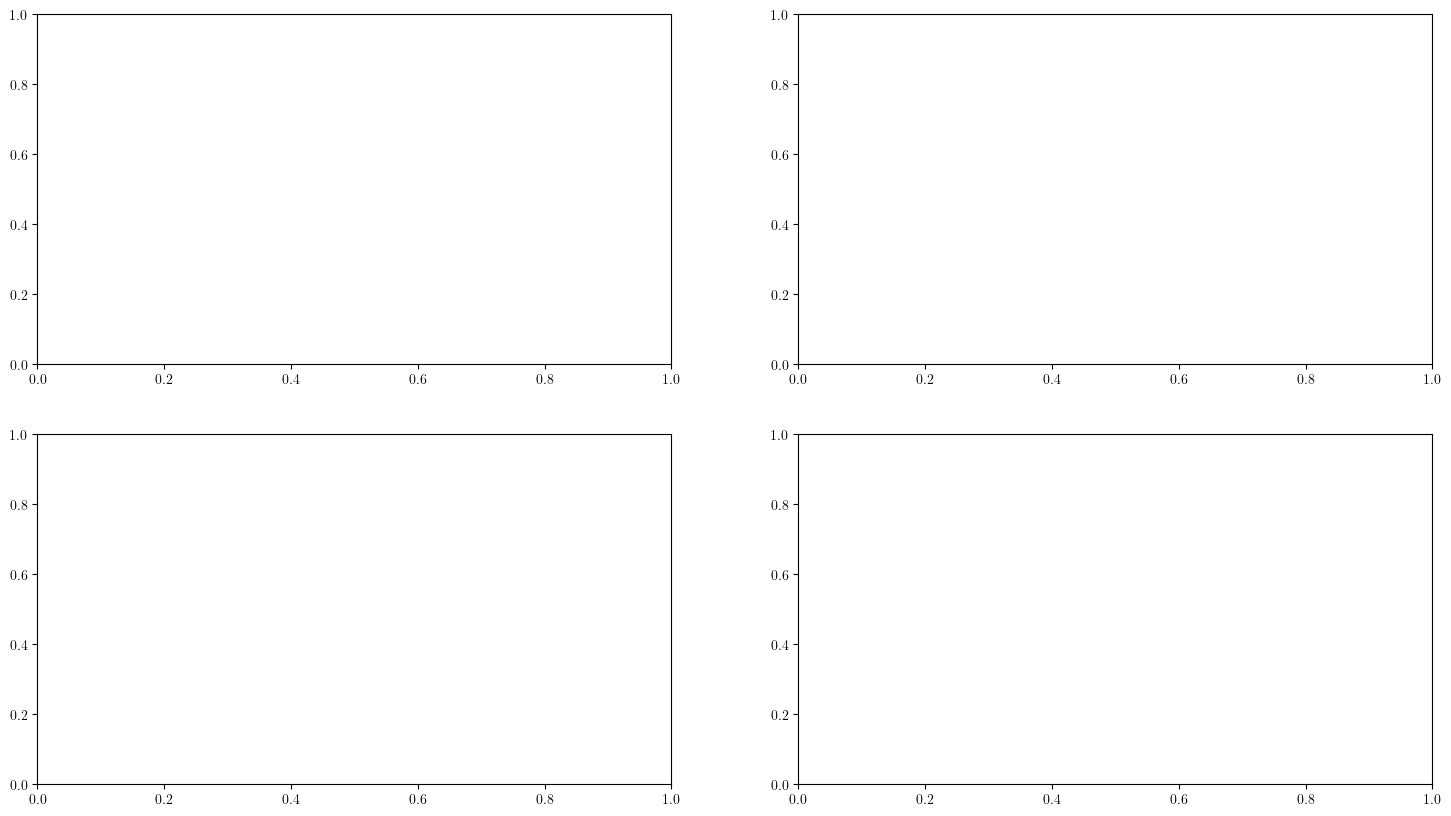

In [12]:
fig, ax = plt.subplots(2, 2, figsize = (18, 10))
for ii, average_bubble in enumerate(bubbleList):
    if ii==0 or ii==1: continue

    tmp = tmpLoaded[ii]
    temp = tempList[tmp]
    lamb = lambList[tmp]
    indmin = int(np.load(path_indcrit(nLat, lamb, phi0, temp)+'.npy'))

    bubble2plot = average_bubble[0,:,:400, 150:-150]
    nT,nN = np.shape(bubble2plot[0])

    kinetic = 0.5*bubble2plot[1]**2.
    gradient = 0.5*bubble2plot[2]**2.
    potential = V(bubble2plot[0], lamb)
    totEbubble = kinetic + gradient + potential

    xpeak = np.argmax(bubble2plot[0,indmin,:]); print(temp, lamb, tmp, xpeak)

    phiprof = bubble2plot[0,:,xpeak+1]
    kinprof = np.trapz(kinetic, dx=dx, axis=1)
    enprof = np.trapz(totEbubble, dx=dx, axis=1)

    slice    = bubble2plot[0,indmin]
    momslice = bubble2plot[1,indmin]
    enslice  = totEbubble[indmin]

    peaks, _ = find_peaks(slice, height=phieq+np.pi/3.)
    ind = np.argmax(slice[peaks[:]])
    fwhm = peak_widths(slice, peaks[[ind]], rel_height=0.5)
    
    labs = r'$\phi_0=$'+str('%.2f'%phi0)+r', $\lambda=$'+str(lamb)+r', $T=$'+str(temp)
    lsl = ('-' if tmp==1 else '--' if tmp==0 else '-.' if tmp==2 else ':')

    ax[0,0].plot(phiprof, ls=lsl, label=labs)
    ax[0,0].axhline(phieq, ls='-', color='darkgray')
    ax[0,0].axhline(2.*np.pi, ls='-', color='darkgray')
    ax[0,0].axvline(indmin, ls=lsl)
    ax[0,1].axvline(indmin, ls=lsl)
    ax[0,1].plot(kinprof, ls=lsl, label=labs)
    ax[1,1].plot(enprof, ls=lsl, label=labs)

    ax[1,0].plot(peaks[[ind]], slice[peaks[[ind]]], "x")
    ax[1,0].hlines(*fwhm[1:], ls=lsl)
    ax[1,0].axhline(np.pi, ls='-', color='darkgray')
    ax[1,0].plot(slice, ls=lsl, label=labs)

    for aa, axx in enumerate(ax.flatten()):
        axx.set_ylabel([r'$\phi$', 'kinetic', 'Crit slice', 'energy'][aa])
        axx.set_xlabel('t')
        axx.legend()
plt.show()

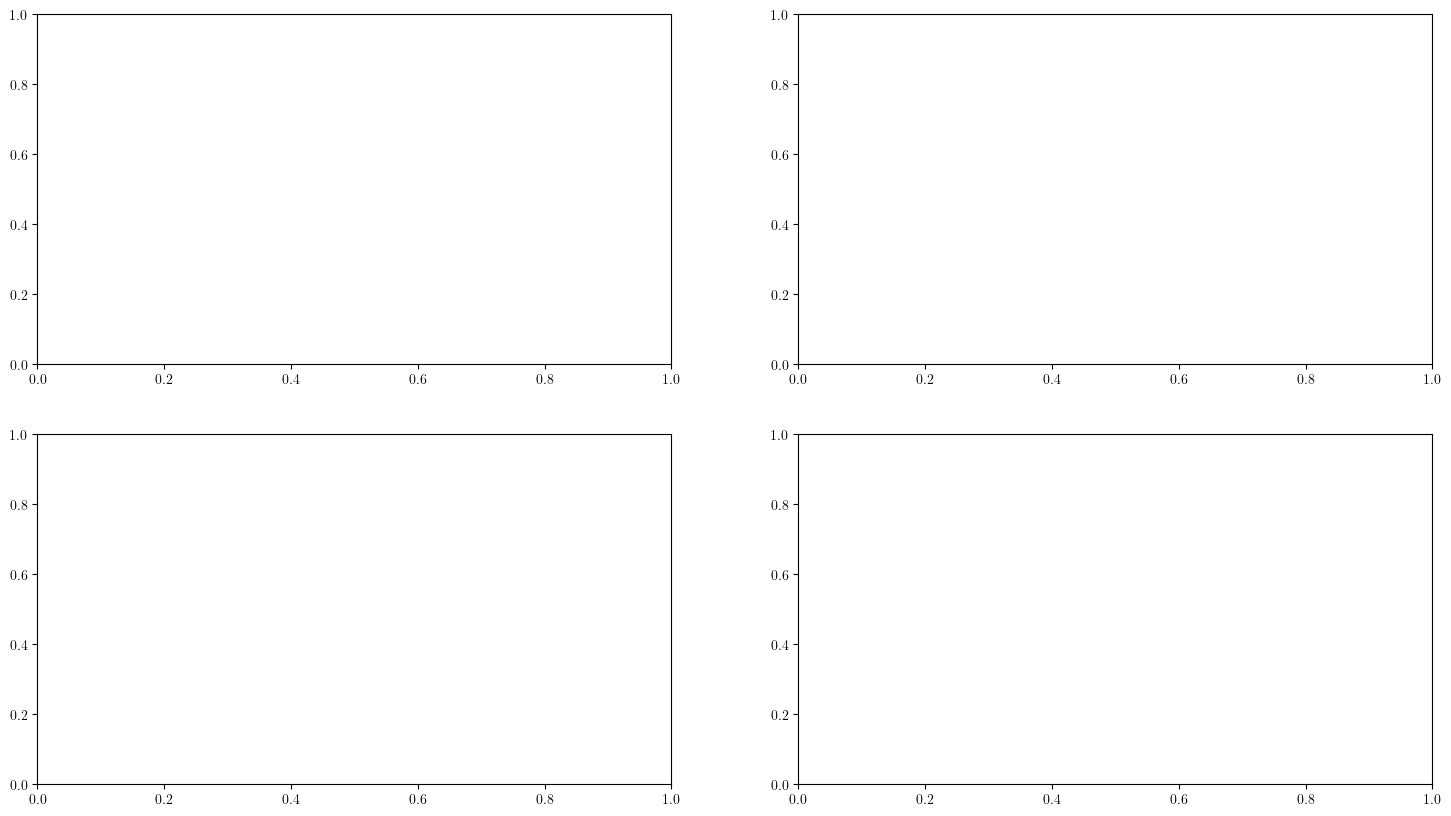

In [13]:
fig, ax = plt.subplots(2, 2, figsize = (18, 10))
for ii, average_bubble in enumerate(bubbleList):
    if ii==0 or ii==3: continue

    tmp = tmpLoaded[ii]
    temp = tempList[tmp]
    lamb = lambList[tmp]
    indmin = int(np.load(path_indcrit(nLat, lamb, phi0, temp)+'.npy'))

    bubble2plot = average_bubble[0,:,:400, 150:-150]
    nT,nN = np.shape(bubble2plot[0])

    kinetic = 0.5*bubble2plot[1]**2.
    gradient = 0.5*bubble2plot[2]**2.
    potential = V(bubble2plot[0], lamb)
    totEbubble = kinetic + gradient + potential

    xpeak = np.argmax(bubble2plot[0,indmin,:]); print(temp, lamb, tmp, xpeak)

    phiprof = bubble2plot[0,:,xpeak+1]
    kinprof = np.trapz(kinetic, dx=dx, axis=1)
    enprof = np.trapz(totEbubble, dx=dx, axis=1)

    slice    = bubble2plot[0,indmin]
    momslice = bubble2plot[1,indmin]
    enslice  = totEbubble[indmin]

    peaks, _ = find_peaks(slice, height=phieq+np.pi/3.)
    ind = np.argmax(slice[peaks[:]])
    fwhm = peak_widths(slice, peaks[[ind]], rel_height=0.5)
    
    labs = r'$\phi_0=$'+str('%.2f'%phi0)+r', $\lambda=$'+str(lamb)+r', $T=$'+str(temp)
    lsl = ('-' if tmp==1 else '--' if tmp==0 else '-.' if tmp==2 else ':')

    ax[0,0].plot(phiprof, ls=lsl, label=labs)
    ax[0,0].axhline(phieq, ls='-', color='darkgray')
    ax[0,0].axhline(2.*np.pi, ls='-', color='darkgray')
    ax[0,0].axvline(indmin, ls=lsl)
    ax[0,1].axvline(indmin, ls=lsl)
    ax[0,1].plot(kinprof, ls=lsl, label=labs)
    ax[1,1].plot(enprof, ls=lsl, label=labs)

    ax[1,0].plot(peaks[[ind]], slice[peaks[[ind]]], "x")
    ax[1,0].hlines(*fwhm[1:], ls=lsl)
    ax[1,0].axhline(np.pi, ls='-', color='darkgray')
    ax[1,0].plot(slice, ls=lsl, label=labs)

    for aa, axx in enumerate(ax.flatten()):
        axx.set_ylabel([r'$\phi$', 'kinetic', 'Crit slice', 'energy'][aa])
        axx.set_xlabel('t')
        axx.legend()
plt.show()

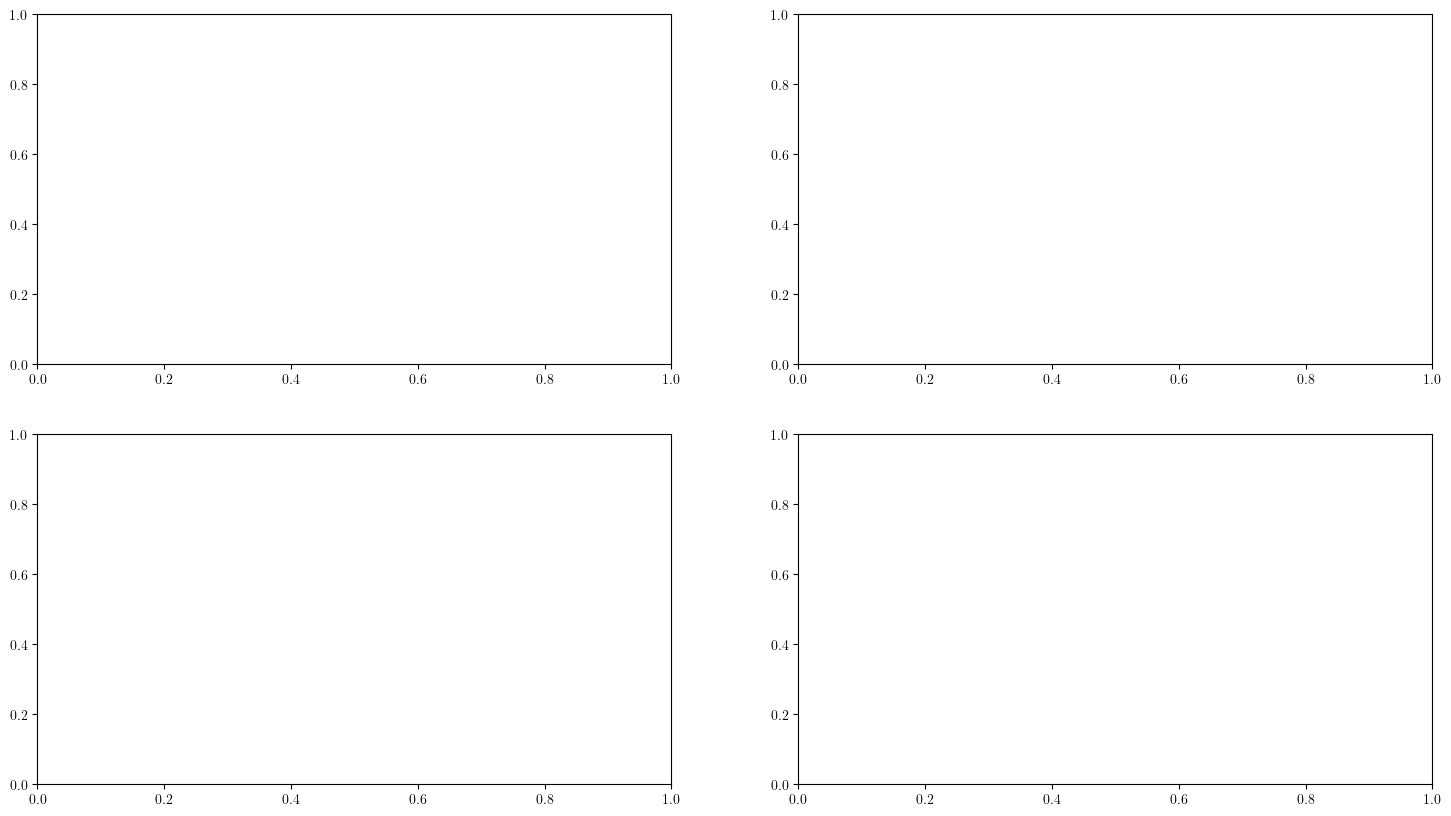

In [14]:
fig, ax = plt.subplots(2, 2, figsize = (18, 10))
for ii, average_bubble in enumerate(bubbleList):
    if ii==2 or ii==3: continue

    tmp = tmpLoaded[ii]
    temp = tempList[tmp]
    lamb = lambList[tmp]
    indmin = int(np.load(path_indcrit(nLat, lamb, phi0, temp)+'.npy'))

    bubble2plot = average_bubble[0,:,:400, 150:-150]
    nT,nN = np.shape(bubble2plot[0])

    kinetic = 0.5*bubble2plot[1]**2.
    gradient = 0.5*bubble2plot[2]**2.
    potential = V(bubble2plot[0], lamb)
    totEbubble = kinetic + gradient + potential

    xpeak = np.argmax(bubble2plot[0,indmin,:]); print(temp, lamb, tmp, xpeak)

    phiprof = bubble2plot[0,:,xpeak+1]
    kinprof = np.trapz(kinetic, dx=dx, axis=1)
    enprof = np.trapz(totEbubble, dx=dx, axis=1)

    slice    = bubble2plot[0,indmin]
    momslice = bubble2plot[1,indmin]
    enslice  = totEbubble[indmin]

    peaks, _ = find_peaks(slice, height=phieq+np.pi/3.)
    ind = np.argmax(slice[peaks[:]])
    fwhm = peak_widths(slice, peaks[[ind]], rel_height=0.5)
    
    labs = r'$\phi_0=$'+str('%.2f'%phi0)+r', $\lambda=$'+str(lamb)+r', $T=$'+str(temp)
    lsl = ('-' if tmp==1 else '--' if tmp==0 else '-.' if tmp==2 else ':')

    ax[0,0].plot(phiprof, ls=lsl, label=labs)
    ax[0,0].axhline(phieq, ls='-', color='darkgray')
    ax[0,0].axhline(2.*np.pi, ls='-', color='darkgray')
    ax[0,0].axvline(indmin, ls=lsl)
    ax[0,1].axvline(indmin, ls=lsl)
    ax[0,1].plot(kinprof, ls=lsl, label=labs)
    ax[1,1].plot(enprof, ls=lsl, label=labs)

    ax[1,0].plot(peaks[[ind]], slice[peaks[[ind]]], "x")
    ax[1,0].hlines(*fwhm[1:], ls=lsl)
    ax[1,0].axhline(np.pi, ls=':', color='darkgray')
    ax[1,0].plot(slice, ls=lsl, label=labs)

    for aa, axx in enumerate(ax.flatten()):
        axx.set_ylabel([r'$\phi$', 'kinetic', 'Crit slice', 'energy'][aa])
        axx.set_xlabel('t')
        axx.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


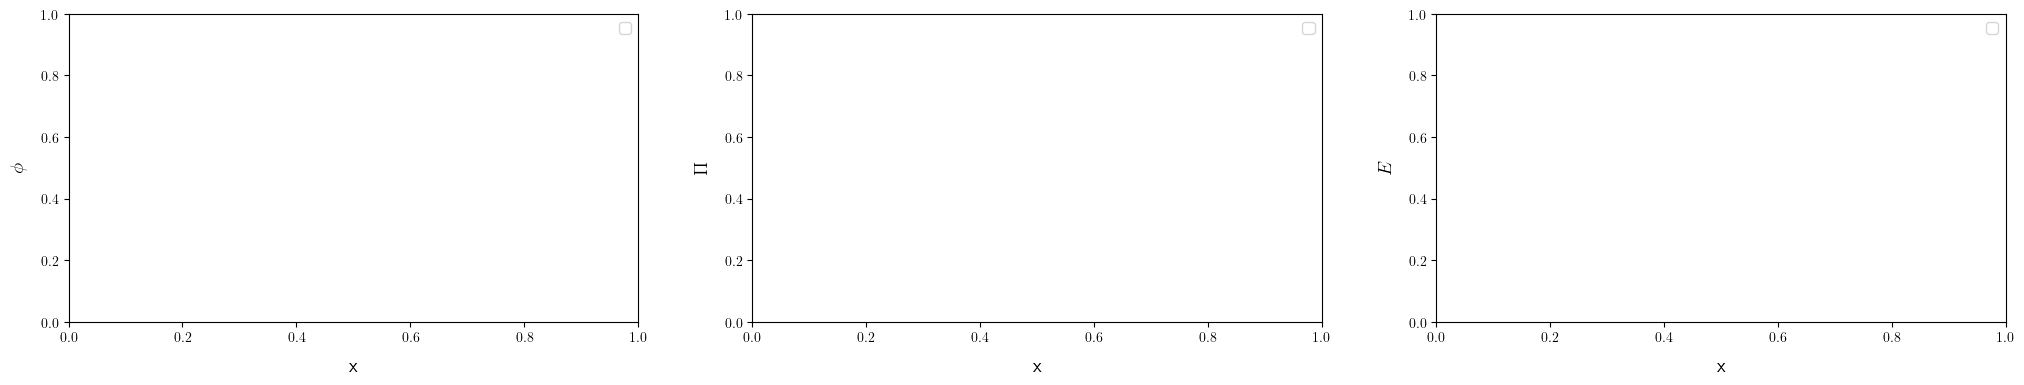

In [15]:
fig, ax = plt.subplots(1, 3, figsize = (25, 4))
for ii, average_bubble in enumerate(bubbleList):
    if ii!=1: continue
    tmp = tmpLoaded[ii]
    temp = tempList[tmp]
    lamb = lambList[tmp]
    
    slice, momslice, enslice = critSlices[ii]
   # slice = instantonList[ii]

    slice = np.concatenate((slice, phieq*np.ones(nLat-len(slice))), axis=0)
    slice = np.roll(slice, nLat-int(-np.abs(nLat/2. - np.argmax(slice))))
    slice = slice - np.pi

    momslice = np.concatenate((momslice, np.zeros(nLat-len(momslice))), axis=0)
    momslice = np.roll(momslice, nLat-int(-np.abs(nLat/2. - np.argmax(momslice))))

    labs = r'$\phi_0=$'+str('%.2f'%phi0)+r', $\lambda=$'+str(lamb)+r', $T=$'+str(temp)
    lsl = ('-' if tmp==0 else '--' if tmp==1 else '-.' if tmp==2 else ':')

    ax[0].plot(slice, label=labs, ls=lsl)
    ax[1].plot(momslice, label=labs, ls=lsl)
    ax[2].plot(enslice, label=labs, ls=lsl)

for aa, axx in enumerate(ax.flatten()):
    axx.set_xlabel('x')
    axx.set_ylabel([r'$\phi$', r'$\Pi$', r'$E$'][aa])
    axx.legend()
plt.show()

In [16]:
crit_soln_f90 = '(/'
for ind, iii in enumerate(slice):
    crit_soln_f90 = crit_soln_f90 + str(iii)
    if ind != len(slice)-1:
        crit_soln_f90 = crit_soln_f90 + ', '
crit_soln_f90 += '/)'
#print(crit_soln_f90)

TypeError: 'type' object is not iterable

In [17]:
crit_soln_f90 = '(/'
for ind, iii in enumerate(momslice):
    crit_soln_f90 = crit_soln_f90 + str(iii)
    if ind != len(momslice)-1:
        crit_soln_f90 = crit_soln_f90 + ', '
crit_soln_f90 += '/)'
#print(crit_soln_f90)

NameError: name 'momslice' is not defined

In [18]:
ii = 1
average_bubble = bubbleList[ii]
tmp = tmpLoaded[ii]
temp = tempList[tmp]
lamb = lambList[tmp]

path_sim = '/gpfs/dpirvu/velocity_comparison/subcritical_'+batch_params(nLat,lamb,phi0,temp) + '_sim0_fields.dat'
crit_real = extract_data(nLat, path_sim)
win = 500
critical2plot = crit_real[:,:win,nLat//2-win:nLat//2+win]
nC, nT, nN = np.shape(critical2plot)

simple_imshow(critical2plot[0], [0,nN,0,nT])


IndexError: list index out of range

In [19]:
path_sim = '/gpfs/dpirvu/velocity_comparison/supercritical_'+batch_params(nLat,lamb,phi0,temp) + '_sim0_fields.dat'
crit_real = extract_data(nLat, path_sim)
win = 500
critical2plot = crit_real[:,:win,nLat//2-win:nLat//2+win]
nC, nT, nN = np.shape(critical2plot)

simple_imshow(critical2plot[0], [0,nN,0,nT])


OSError: /gpfs/dpirvu/velocity_comparison/supercritical_x512_phi01.9040_lambda1.4000_T0.1000_sim0_fields.dat not found.

In [20]:
path_sim = '/gpfs/dpirvu/velocity_comparison/instanton_'+batch_params(nLat,lamb,phi0,temp) + '_sim0_fields.dat'
crit_real = extract_data(nLat, path_sim)
win = 500
critical2plot = crit_real[:,:win,nLat//2-win:nLat//2+win]
nC, nT, nN = np.shape(critical2plot)

simple_imshow(critical2plot[0], [0,nN,0,nT])


OSError: /gpfs/dpirvu/velocity_comparison/instanton_x512_phi01.9040_lambda1.4000_T0.1000_sim0_fields.dat not found.

In [21]:
ii = 2
average_bubble = bubbleList[ii]
tmp  = tmpLoaded[ii]
temp = tempList[tmp]
lamb = lambList[tmp]
win  = 500

path_sim_sub = '/gpfs/dpirvu/velocity_comparison/subcritical_'+batch_params(nLat,lamb,phi0,temp) + '_sim0_fields.dat'
path_sim_crit = '/gpfs/dpirvu/velocity_comparison/supercritical_'+batch_params(nLat,lamb,phi0,temp) + '_sim0_fields.dat'

sigmafld=fluct_stdev(lamb, phi0, temp)
right_Vmax  = sco.minimize_scalar(Vinv, args=lamb, bounds=(np.pi, 2*np.pi), method='bounded')
left_Vmax   = sco.minimize_scalar(Vinv, args=lamb, bounds=(0    ,   np.pi), method='bounded')
crit_thresh = right_Vmax.x+2.*sigmafld

threshSize = crit_thresh
critSize = 30

titls = ['Sub-critical', 'Critical']
if True:
    subcrit_real = extract_data(nLat, path_sim_sub)
    crit_real = extract_data(nLat, path_sim_crit)

    subcritical2plot = subcrit_real[0,:win,nLat//2-win:nLat//2+win]
    exts1 = np.asarray([-nN//2,nN//2,0,nT])*dx2plot

    critical2plot = crit_real[0,:win,nLat//2-win:nLat//2+win]
    t0,x0 = find_nucleation_center(critical2plot, phieq, threshSize, critSize)
    nT, nN = np.shape(critical2plot)
    exts2 = np.asarray([-nN//2,nN//2,0-t0,nT-t0])*dx2plot

    fig, ax = plt.subplots(1, 2, figsize = (12, 5))
    im0 = ax[0].imshow(subcritical2plot, aspect='auto', interpolation='none', extent=exts1, origin='lower', cmap='tab20b')
    clb0 = plt.colorbar(im0, ax = ax[0], ticks=matplotlib.ticker.MultipleLocator(np.pi/2), \
                                          format=matplotlib.ticker.FuncFormatter(multiple_formatter()))
    clb0.ax.set_title(r'$\bar{\phi}$')
    im1 = ax[1].imshow(critical2plot, aspect='auto', interpolation='none', extent=exts2, origin='lower', cmap='tab20b')
    clb1 = plt.colorbar(im1, ax = ax[1], ticks=matplotlib.ticker.MultipleLocator(np.pi/2), \
                                          format=matplotlib.ticker.FuncFormatter(multiple_formatter()))
    clb1.ax.set_title(r'$\bar{\phi}$')
    ax[0].legend(title=titls[0], loc=4, fontsize='small', fancybox=True, frameon=True, framealpha=0.75, borderpad=0.3)
    ax[1].legend(title=titls[1], loc=4, fontsize='small', fancybox=True, frameon=True, framealpha=0.75, borderpad=0.3)

    for aa in ax:
        aa.tick_params(direction='in', which='both', top=True, right=True)
        aa.grid(ls=':', color='darkgray', alpha=0.5)
        aa.grid(ls=':', color='darkgray', alpha=0.5)
        aa.set(xlabel=r'$\phi_0^{-1} \sqrt{V_0} \; r$')
        aa.set(ylabel=r'$\phi_0^{-1} \sqrt{V_0} \; t$')
    plt.savefig('./data/comparison_simulation_criticals2.pdf',bbox_inches='tight')
    plt.show()

IndexError: list index out of range

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


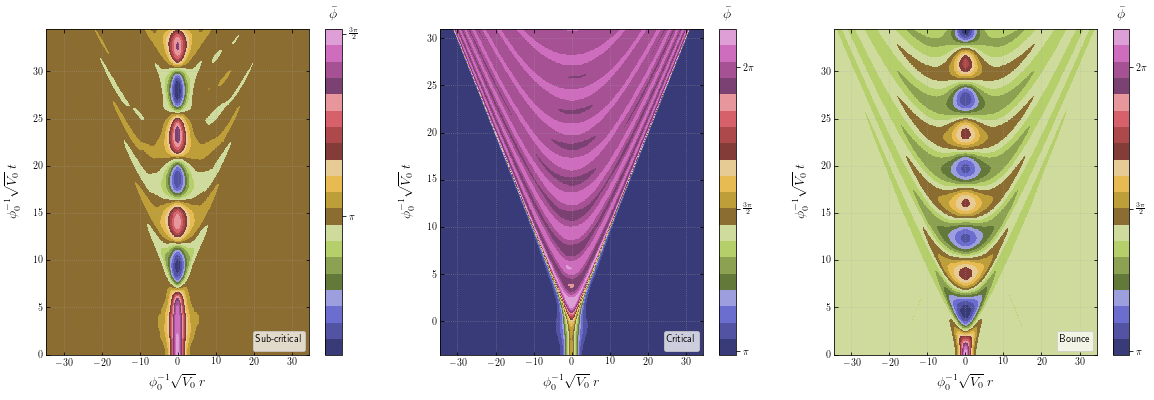

In [20]:
ii = 2
average_bubble = bubbleList[ii]
tmp  = tmpLoaded[ii]
temp = tempList[tmp]
lamb = lambList[tmp]
win  = 500

path_sim_sub = '/gpfs/dpirvu/velocity_comparison/subcritical_'+batch_params(nLat,lamb,phi0,temp) + '_sim0_fields.dat'
path_sim_crit = '/gpfs/dpirvu/velocity_comparison/supercritical_'+batch_params(nLat,lamb,phi0,temp) + '_sim0_fields.dat'
path_sim_inst = '/gpfs/dpirvu/velocity_comparison/instanton_'+batch_params(nLat,lamb,phi0,temp) + '_sim0_fields.dat'
titls = ['Sub-critical', 'Critical', 'Bounce']

if True:
    subcrit_real = extract_data(nLat, path_sim_sub)
    crit_real = extract_data(nLat, path_sim_crit)
    inst_real = extract_data(nLat, path_sim_inst)

    subcritical2plot = subcrit_real[0,:win,nLat//2-win:nLat//2+win]
    exts1 = np.asarray([-nN//2,nN//2,0,nT])*dx2plot

    critical2plot = crit_real[0,:win,nLat//2-win:nLat//2+win]
    t0,x0 = find_nucleation_center(critical2plot, phieq, threshSize, critSize)
    nT, nN = np.shape(critical2plot)
    exts2 = np.asarray([-nN//2,nN//2,0-t0,nT-t0])*dx2plot

    instanton2plot = inst_real[0,:win,nLat//2-win:nLat//2+win]
    exts3 = np.asarray([-nN//2,nN//2,0,nT])*dx2plot

    fig, ax = plt.subplots(1, 3, figsize = (20, 6))
    im0 = ax[0].imshow(subcritical2plot, aspect='auto', interpolation='none', extent=exts1, origin='lower', cmap='tab20b')
    clb0 = plt.colorbar(im0, ax = ax[0], ticks=matplotlib.ticker.MultipleLocator(np.pi/2), \
                                          format=matplotlib.ticker.FuncFormatter(multiple_formatter()))
    clb0.ax.set_title(r'$\bar{\phi}$')
    im1 = ax[1].imshow(critical2plot, aspect='auto', interpolation='none', extent=exts2, origin='lower', cmap='tab20b')
    clb1 = plt.colorbar(im1, ax = ax[1], ticks=matplotlib.ticker.MultipleLocator(np.pi/2), \
                                          format=matplotlib.ticker.FuncFormatter(multiple_formatter()))
    clb1.ax.set_title(r'$\bar{\phi}$')
    im2 = ax[2].imshow(instanton2plot, aspect='auto', interpolation='none', extent=exts3, origin='lower', cmap='tab20b')
    clb2 = plt.colorbar(im1, ax = ax[2], ticks=matplotlib.ticker.MultipleLocator(np.pi/2), \
                                          format=matplotlib.ticker.FuncFormatter(multiple_formatter()))
    clb2.ax.set_title(r'$\bar{\phi}$')

    ax[0].legend(title=titls[0], loc=4, fontsize='small', fancybox=True, frameon=True, framealpha=0.75, borderpad=0.3)
    ax[1].legend(title=titls[1], loc=4, fontsize='small', fancybox=True, frameon=True, framealpha=0.75, borderpad=0.3)
    ax[2].legend(title=titls[2], loc=4, fontsize='small', fancybox=True, frameon=True, framealpha=0.75, borderpad=0.3)

    for aa in ax:
        aa.tick_params(direction='in', which='both', top=True, right=True)
        aa.grid(ls=':', color='darkgray', alpha=0.5)
        aa.grid(ls=':', color='darkgray', alpha=0.5)
        aa.set(xlabel=r'$\phi_0^{-1} \sqrt{V_0} \; r$')
        aa.set(ylabel=r'$\phi_0^{-1} \sqrt{V_0} \; t$')
    plt.savefig('./data/comparison_simulation_criticals_thermal.pdf',bbox_inches='tight')
    plt.show()

In [21]:
ii = 2
average_bubble = bubbleList[ii]
tmp  = tmpLoaded[ii]
temp = tempList[tmp]
lamb = lambList[tmp]
win  = 300

path_sim_sub = '/gpfs/dpirvu/velocity_comparison/subcritical_'+batch_params(nLat,lamb,phi0,temp) + '_sim0_fields.dat'
path_sim_crit = '/gpfs/dpirvu/velocity_comparison/supercritical_'+batch_params(nLat,lamb,phi0,temp) + '_sim0_fields.dat'
path_sim_inst = '/gpfs/dpirvu/velocity_comparison/instanton_'+batch_params(nLat,lamb,phi0,temp) + '_sim0_fields.dat'
titls = [r'$\rm Sub-critical$', r'$\rm Critical$', r'$\rm Bounce$']

subcrit_real = extract_data(nLat, path_sim_sub)
crit_real = extract_data(nLat, path_sim_crit)
inst_real = extract_data(nLat, path_sim_inst)


In [22]:
sigmafld=fluct_stdev(lamb, phi0, temp)
right_Vmax  = sco.minimize_scalar(Vinv, args=lamb, bounds=(np.pi, 2*np.pi), method='bounded')
left_Vmax   = sco.minimize_scalar(Vinv, args=lamb, bounds=(0    ,   np.pi), method='bounded')
crit_thresh = right_Vmax.x+2.*sigmafld

threshSize = crit_thresh
critSize = 30


/cm/shared/apps/conda-environments/python37/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: The following kwargs were not used by contour: 'aspect', 'interpolation'
/cm/shared/apps/conda-environments/python37/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: The following kwargs were not used by contour: 'aspect', 'interpolation'
No handles with labels found to put in legend.
No handles with labels found to put in legend.


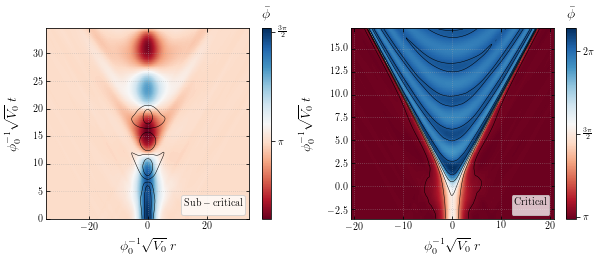

In [23]:
if True:
    subcritical2plot = subcrit_real[0,:win,nLat//2-win:nLat//2+win]
    exts1 = np.asarray([-nN//2,nN//2,0,nT])*dx2plot

    critical2plot = crit_real[0,:win,nLat//2-win:nLat//2+win]
    t0,x0 = find_nucleation_center(critical2plot, phieq, threshSize, critSize)
    nT, nN = np.shape(critical2plot)
    exts2 = np.asarray([-nN//2,nN//2,0-t0,nT-t0])*dx2plot

    tt = np.arange(0, nT)*dx2plot
    xx = np.arange(-nN//2, nN//2)*dx2plot
    ttt2, xxx2 = np.meshgrid(tt, xx)
    tt = np.arange(-t0, nT-t0)*dx2plot
    xx = np.arange(-nN//2, nN//2)*dx2plot
    ttt1, xxx1 = np.meshgrid(tt, xx)

    fig, ax = plt.subplots(1, 2, figsize = (10,3.5))
    im0 = ax[0].imshow(subcritical2plot, aspect='auto', interpolation='none', extent=exts1, origin='lower', cmap='RdBu')
    ax[0].contour(xxx2, ttt2, subcritical2plot.T, levels=4, aspect='auto', interpolation='none', extent=exts1, origin='lower', colors='k',linewidths=0.5)
    
    clb0 = plt.colorbar(im0, ax = ax[0], ticks=matplotlib.ticker.MultipleLocator(np.pi/2), \
                                          format=matplotlib.ticker.FuncFormatter(multiple_formatter()))
    clb0.ax.set_title(r'$\bar{\phi}$')
    im1 = ax[1].imshow(critical2plot, aspect='auto', interpolation='none', extent=exts2, origin='lower', cmap='RdBu')
    ax[1].contour(xxx1, ttt1, critical2plot.T, levels=4, aspect='auto', interpolation='none', extent=exts2, origin='lower', colors='k',linewidths=0.5)
    
    clb1 = plt.colorbar(im1, ax = ax[1], ticks=matplotlib.ticker.MultipleLocator(np.pi/2), \
                                          format=matplotlib.ticker.FuncFormatter(multiple_formatter()))
    clb1.ax.set_title(r'$\bar{\phi}$')

    ax[0].legend(title=titls[0], loc=4, fontsize='small', fancybox=True, frameon=True, framealpha=0.75, borderpad=0.3)
    ax[1].legend(title=titls[1], loc=4, fontsize='small', fancybox=True, frameon=True, framealpha=0.75, borderpad=0.3)

    for aa in ax:
        aa.tick_params(direction='in', which='both', top=True, right=True)
        aa.grid(ls=':', color='darkgray', alpha=0.5)
        aa.grid(ls=':', color='darkgray', alpha=0.5)
        aa.set(xlabel=r'$\phi_0^{-1} \sqrt{V_0} \; r$')
        aa.set(ylabel=r'$\phi_0^{-1} \sqrt{V_0} \; t$')
    plt.savefig('./data/comparison_simulation_criticals_thermal.pdf',bbox_inches='tight',dpi=500)
    plt.show()

/cm/shared/apps/conda-environments/python37/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: The following kwargs were not used by contour: 'aspect', 'interpolation'
  # This is added back by InteractiveShellApp.init_path()


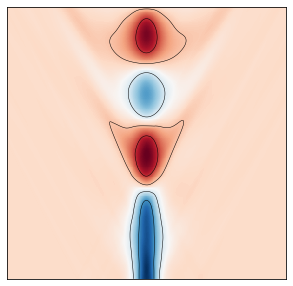

In [24]:
if True:
    subcritical2plot = subcrit_real[0,:win,nLat//2-win:nLat//2+win]
    nT, nN = np.shape(subcritical2plot)
    exts1 = np.asarray([-nN//2,nN//2,0,nT])*dx2plot
    tt = np.arange(0, nT)*dx2plot
    xx = np.arange(-nN//2, nN//2)*dx2plot
    ttt2, xxx2 = np.meshgrid(tt, xx)

    fig, ax = plt.subplots(1, 1, figsize = (5,5))
    im1 = ax.imshow(subcritical2plot, aspect='auto', interpolation='none', extent=exts1, origin='lower', cmap='RdBu')
    ax.contour(xxx2, ttt2, subcritical2plot.T, levels=4, aspect='auto', interpolation='none', extent=exts1, origin='lower', colors='k',linewidths=0.5)

    for aa in [ax]:
        aa.tick_params(direction='in', which='both', top=True, right=True)
        aa.axes.get_xaxis().set_ticks([])
        aa.axes.get_yaxis().set_ticks([])

    plt.savefig('./data/sub-crit.pdf',bbox_inches='tight',dpi=2000)
    plt.show()

/cm/shared/apps/conda-environments/python37/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: The following kwargs were not used by contour: 'aspect', 'interpolation'
  if sys.path[0] == '':


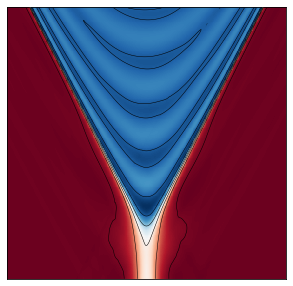

In [25]:
if True:
    critical2plot = crit_real[0,:win,nLat//2-win:nLat//2+win]
    t0,x0 = find_nucleation_center(critical2plot, phieq, threshSize, critSize)
    nT, nN = np.shape(critical2plot)
    exts2 = np.asarray([-nN//2,nN//2,-t0,nT-t0])*dx2plot
    tt = np.arange(0-t0, nT-t0)*dx2plot
    xx = np.arange(-nN//2, nN//2)*dx2plot
    ttt1, xxx1 = np.meshgrid(tt, xx)

    fig, ax = plt.subplots(1, 1, figsize = (5,5))
    im1 = ax.imshow(critical2plot, aspect='auto', interpolation='none', extent=exts2, origin='lower', cmap='RdBu')
    ax.contour(xxx1, ttt1, critical2plot.T, levels=4, aspect='auto', interpolation='none', extent=exts2, origin='lower', colors='k',linewidths=0.5)

    for aa in [ax]:
        aa.tick_params(direction='in', which='both', top=True, right=True)
        aa.axes.get_xaxis().set_ticks([])
        aa.axes.get_yaxis().set_ticks([])

    plt.savefig('./data/crit.pdf',bbox_inches='tight',dpi=2000)
    plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


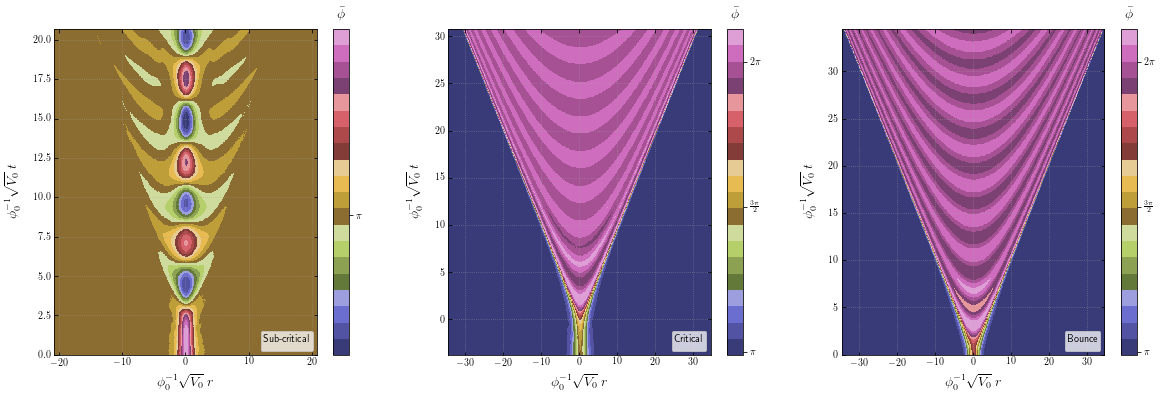

In [26]:
ii = 1
average_bubble = bubbleList[ii]
tmp  = tmpLoaded[ii]
temp = tempList[tmp]
lamb = lambList[tmp]
win  = 500

path_sim_sub = '/gpfs/dpirvu/velocity_comparison/subcritical_'+batch_params(nLat,lamb,phi0,temp) + '_sim0_fields.dat'
path_sim_crit = '/gpfs/dpirvu/velocity_comparison/supercritical_'+batch_params(nLat,lamb,phi0,temp) + '_sim0_fields.dat'
path_sim_inst = '/gpfs/dpirvu/velocity_comparison/instanton_'+batch_params(nLat,lamb,phi0,temp) + '_sim0_fields.dat'
titls = ['Sub-critical', 'Critical', 'Bounce']

if True:
    subcrit_real = extract_data(nLat, path_sim_sub)
    crit_real = extract_data(nLat, path_sim_crit)
    inst_real = extract_data(nLat, path_sim_inst)

    subcritical2plot = subcrit_real[0,:win,nLat//2-win:nLat//2+win]
    exts1 = np.asarray([-nN//2,nN//2,0,nT])*dx2plot

    critical2plot = crit_real[0,:win,nLat//2-win:nLat//2+win]
    t0,x0 = find_nucleation_center(critical2plot, phieq, threshSize, critSize)
    nT, nN = np.shape(critical2plot)
    exts2 = np.asarray([-nN//2,nN//2,0-t0,nT-t0])*dx2plot

    instanton2plot = inst_real[0,:win,nLat//2-win:nLat//2+win]
    exts3 = np.asarray([-nN//2,nN//2,0,nT])*dx2plot

    fig, ax = plt.subplots(1, 3, figsize = (20, 6))
    im0 = ax[0].imshow(subcritical2plot, aspect='auto', interpolation='none', extent=exts1, origin='lower', cmap='tab20b')
    clb0 = plt.colorbar(im0, ax = ax[0], ticks=matplotlib.ticker.MultipleLocator(np.pi/2), \
                                          format=matplotlib.ticker.FuncFormatter(multiple_formatter()))
    clb0.ax.set_title(r'$\bar{\phi}$')
    im1 = ax[1].imshow(critical2plot, aspect='auto', interpolation='none', extent=exts2, origin='lower', cmap='tab20b')
    clb1 = plt.colorbar(im1, ax = ax[1], ticks=matplotlib.ticker.MultipleLocator(np.pi/2), \
                                          format=matplotlib.ticker.FuncFormatter(multiple_formatter()))
    clb1.ax.set_title(r'$\bar{\phi}$')
    im2 = ax[2].imshow(instanton2plot, aspect='auto', interpolation='none', extent=exts3, origin='lower', cmap='tab20b')
    clb2 = plt.colorbar(im1, ax = ax[2], ticks=matplotlib.ticker.MultipleLocator(np.pi/2), \
                                          format=matplotlib.ticker.FuncFormatter(multiple_formatter()))
    clb2.ax.set_title(r'$\bar{\phi}$')

    ax[0].legend(title=titls[0], loc=4, fontsize='small', fancybox=True, frameon=True, framealpha=0.75, borderpad=0.3)
    ax[1].legend(title=titls[1], loc=4, fontsize='small', fancybox=True, frameon=True, framealpha=0.75, borderpad=0.3)
    ax[2].legend(title=titls[2], loc=4, fontsize='small', fancybox=True, frameon=True, framealpha=0.75, borderpad=0.3)

    for aa in ax:
        aa.tick_params(direction='in', which='both', top=True, right=True)
        aa.grid(ls=':', color='darkgray', alpha=0.5)
        aa.grid(ls=':', color='darkgray', alpha=0.5)
        aa.set(xlabel=r'$\phi_0^{-1} \sqrt{V_0} \; r$')
        aa.set(ylabel=r'$\phi_0^{-1} \sqrt{V_0} \; t$')
    plt.savefig('./data/comparison_simulation_criticals.pdf',bbox_inches='tight')
    plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
/cm/shared/apps/conda-environments/python37/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
/home/dpirvu/.local/lib/python3.7/site-packages/mpl_toolkits/axes_grid1/axes_grid.py:51: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid1.colorbar module was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use matplotlib.colorbar instead.
  from .colorbar import Colorbar
No handles with labels found to put in legend.


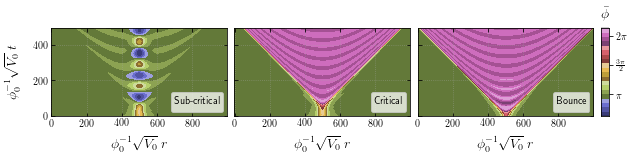

In [27]:
fig = plt.figure(figsize = (10, 3.5))
grid = ImageGrid(fig, 111, nrows_ncols=(1, 3), share_all=True, axes_pad=0.1, cbar_location="right", cbar_mode="single")
im = [[]]*len(grid)

mainList = np.asarray([subcritical2plot, critical2plot, instanton2plot])
valmin, valmax = np.amin(mainList), np.amax(mainList)

titls = ['Sub-critical', 'Critical', 'Bounce']
for ii, average_bubble in enumerate(mainList):

    im[ii] = grid[ii].imshow(average_bubble, aspect='equal', origin='lower', cmap='tab20b')
    im[ii].set_clim(vmin=valmin, vmax=valmax)
    if ii==2:
        cbar = grid[ii].cax.colorbar(im[ii], ticks=matplotlib.ticker.MultipleLocator(np.pi/2), \
                                         format=matplotlib.ticker.FuncFormatter(multiple_formatter()))
        cbar.ax.set_title(r'$\bar{\phi}$')
    grid[ii].cax.toggle_label(True)
    grid[ii].tick_params(direction='in', which='both', top=True, right=True)
    grid[ii].set(xlabel=r'$\phi_0^{-1} \sqrt{V_0} \; r$')
    grid[0].set(ylabel=r'$\phi_0^{-1} \sqrt{V_0} \; t$')
    grid[ii].legend(title=titls[ii], loc=4, fontsize='small', fancybox=True, frameon=True, framealpha=0.75, borderpad=0.3)
    grid[ii].grid(ls=':', color='darkgray', alpha=0.5)
plt.savefig('./data/compare_supercritical_with_instanton.pdf', rasterize=True)
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
/cm/shared/apps/conda-environments/python37/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
No handles with labels found to put in legend.


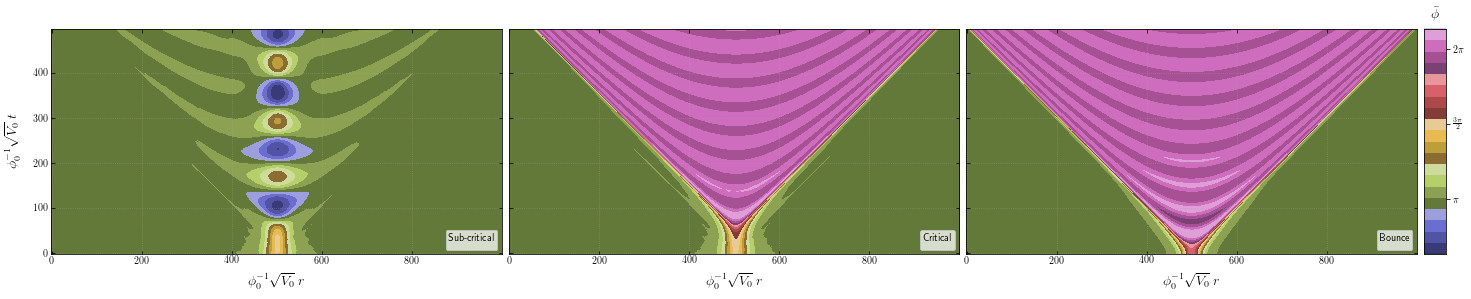

In [28]:
fig = plt.figure(figsize = (25, 10))
grid = ImageGrid(fig, 111, nrows_ncols=(1, 3), share_all=True, axes_pad=0.1, cbar_location="right", cbar_mode="single")
im = [[]]*len(grid)

mainList = np.asarray([subcritical2plot, critical2plot, instanton2plot])
valmin, valmax = np.amin(mainList), np.amax(mainList)

titls = ['Sub-critical', 'Critical', 'Bounce']
for ii, average_bubble in enumerate(mainList):

    im[ii] = grid[ii].imshow(average_bubble, aspect='equal', origin='lower', cmap='tab20b')
    im[ii].set_clim(vmin=valmin, vmax=valmax)
    if ii==2:
        cbar = grid[ii].cax.colorbar(im[ii], ticks=matplotlib.ticker.MultipleLocator(np.pi/2), \
                                         format=matplotlib.ticker.FuncFormatter(multiple_formatter()))
        cbar.ax.set_title(r'$\bar{\phi}$')
    grid[ii].cax.toggle_label(True)
    grid[ii].tick_params(direction='in', which='both', top=True, right=True)
    grid[ii].set(xlabel=r'$\phi_0^{-1} \sqrt{V_0} \; r$')
    grid[0].set(ylabel=r'$\phi_0^{-1} \sqrt{V_0} \; t$')
    grid[ii].legend(title=titls[ii], loc=4, fontsize='small', fancybox=True, frameon=True, framealpha=0.75, borderpad=0.3)
    grid[ii].grid(ls=':', color='darkgray', alpha=0.5)
plt.savefig('./data/compare_supercritical_with_instanton.pdf', rasterize=True)
plt.show()

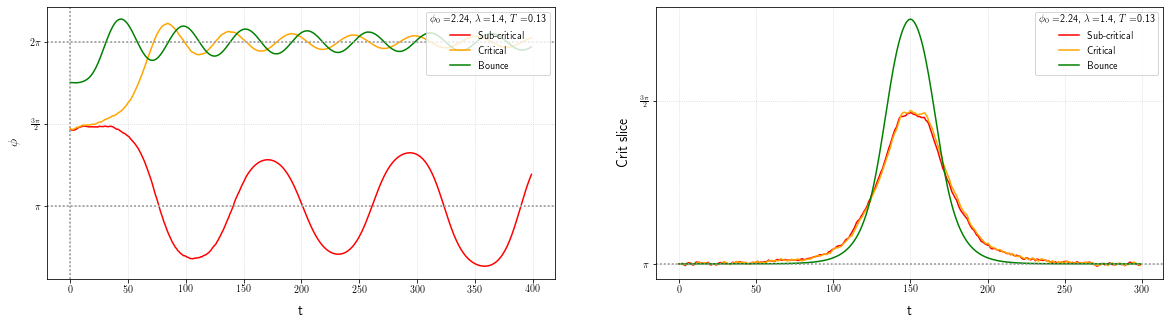

In [29]:
ii = 2
average_bubble = bubbleList[ii]
tmp  = tmpLoaded[ii]
temp = tempList[tmp]
lamb = lambList[tmp]
win  = 500

critSize = 30
colors = cycle(['r', 'orange', 'green', 'blue'])
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
for ii, average_bubble in enumerate(mainList):#, bubbleList[1][0,0]]):
    indmin = 0
    col = next(colors)

    bubble2plot = average_bubble[:400]
    nT, nN = np.shape(bubble2plot)

    slice = bubble2plot[indmin]
    xpeak = np.argmax(slice)
    phiprof = bubble2plot[:,xpeak]
    tind = np.argmax(phiprof)

    ax[0].plot(np.arange(len(phiprof)), phiprof, color=col, ls='-', label=titls[ii])
    ax[0].axvline(indmin, ls=':', color='darkgray')
    ax[1].plot(slice[350:-350], color=col, ls='-', label=titls[ii])

    labs = r'$\phi_0=$'+str('%.2f'%phi0)+r', $\lambda=$'+str(lamb)+r', $T=$'+str(temp)
    for aa, axx in enumerate(ax):
        axx.axhline(phieq, ls=':', color='darkgray')
        if aa==0:
            axx.axhline(2.*np.pi, ls=':', color='darkgray')
        axx.set_xlabel('t')
        axx.set_ylabel([r'$\phi$', 'Crit slice'][aa])
        axx.legend(loc=1, title=labs)
        axx.grid(ls=':', color='darkgray', alpha=0.5)
        axx.yaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
        axx.yaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))

plt.savefig('./data/comparisons_crit_slices.pdf',bbox_inches='tight')
plt.show()

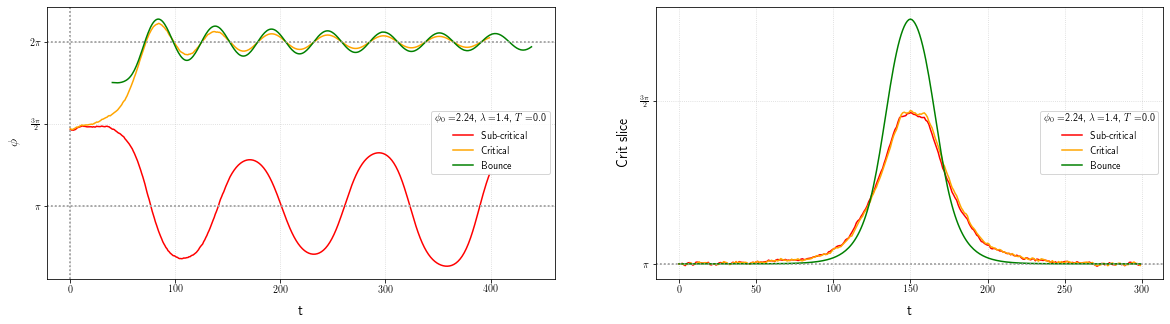

In [30]:
ii = 1
average_bubble = bubbleList[ii]
tmp  = tmpLoaded[ii]
temp = tempList[tmp]
lamb = lambList[tmp]
win  = 500

critSize = 30
colors = cycle(['r', 'orange', 'green', 'blue'])
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
for ii, average_bubble in enumerate(mainList):#, bubbleList[1][0,0]]):
    indmin = 0
    col = next(colors)

    bubble2plot = average_bubble[:400]
    nT, nN = np.shape(bubble2plot)

    slice = bubble2plot[indmin]
    xpeak = np.argmax(slice)
    phiprof = bubble2plot[:,xpeak]
    tind = np.argmax(phiprof)
    if ii==1:
        tindspecial = np.argmax(phiprof)
    
    if ii!=2:
        ax[0].plot(np.arange(len(phiprof)), phiprof, color=col, ls='-', label=titls[ii])
    else:
        t0,x0 = find_nucleation_center(bubble2plot, phieq, threshSize, critSize)
        ax[0].plot(np.arange(len(phiprof))-(tind-tindspecial), phiprof, color=col, ls='-', label=titls[ii])
    ax[0].axvline(indmin, ls=':', color='darkgray')
    ax[1].plot(slice[350:-350], color=col, ls='-', label=titls[ii])

    labs = r'$\phi_0=$'+str('%.2f'%phi0)+r', $\lambda=$'+str(lamb)+r', $T=$'+str(temp)
    for aa, axx in enumerate(ax):
        axx.axhline(phieq, ls=':', color='darkgray')
        if aa==0:
            axx.axhline(2.*np.pi, ls=':', color='darkgray')
        axx.set_xlabel('t')
        axx.set_ylabel([r'$\phi$', 'Crit slice'][aa])
        axx.legend(loc='center right', title=labs)
        axx.grid(ls=':', color='darkgray', alpha=0.5)
        axx.yaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
        axx.yaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))

plt.savefig('./data/comparisons_crit_slices.pdf',bbox_inches='tight')
plt.show()

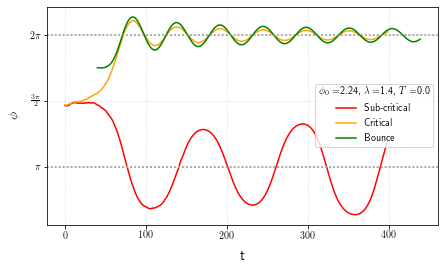

In [31]:
critSize = 30
colors = cycle(['r', 'orange', 'green', 'blue'])
fig, ax = plt.subplots(1, 1, figsize = (7, 4))
for ii, average_bubble in enumerate(mainList):#, bubbleList[1][0,0]]):
    indmin = 0
    col = next(colors)

    bubble2plot = average_bubble[:400]
    nT, nN = np.shape(bubble2plot)

    slice = bubble2plot[indmin]
    xpeak = np.argmax(slice)
    phiprof = bubble2plot[:,xpeak]
    tind = np.argmax(phiprof)
    if ii==1:
        tindspecial = np.argmax(phiprof)

    if ii!=2:
        ax.plot(np.arange(len(phiprof)), phiprof, color=col, ls='-', label=titls[ii])
    else:
        t0,x0 = find_nucleation_center(bubble2plot, phieq, threshSize, critSize)
        ax.plot(np.arange(len(phiprof))-(tind-tindspecial), phiprof, color=col, ls='-', label=titls[ii])

    labs = r'$\phi_0=$'+str('%.2f'%phi0)+r', $\lambda=$'+str(lamb)+r', $T=$'+str(temp)
    ax.axhline(phieq, ls=':', color='darkgray')
    ax.axhline(2.*np.pi, ls=':', color='darkgray')
    ax.set_xlabel('t')
    ax.set_ylabel([r'$\phi$', 'Crit slice'][0])
    ax.legend(loc='center right', title=labs)
    ax.grid(ls=':', color='darkgray', alpha=0.5)
    ax.yaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
plt.savefig('./data/comparisons_crit_slices.pdf',bbox_inches='tight')
plt.show()

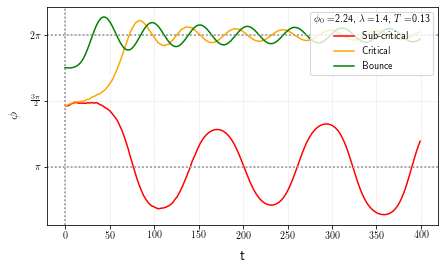

In [32]:
ii = 2
average_bubble = bubbleList[ii]
tmp  = tmpLoaded[ii]
temp = tempList[tmp]
lamb = lambList[tmp]
win  = 500

critSize = 30
colors = cycle(['r', 'orange', 'green', 'blue'])
fig, ax = plt.subplots(1, 1, figsize = (7, 4))
for ii, average_bubble in enumerate(mainList):#, bubbleList[1][0,0]]):
    indmin = 0
    col = next(colors)

    bubble2plot = average_bubble[:400]
    nT, nN = np.shape(bubble2plot)

    slice = bubble2plot[indmin]
    xpeak = np.argmax(slice)
    phiprof = bubble2plot[:,xpeak]
    tind = np.argmax(phiprof)

    ax.plot(np.arange(len(phiprof)), phiprof, color=col, ls='-', label=titls[ii])
    ax.axvline(indmin, ls=':', color='darkgray')

    labs = r'$\phi_0=$'+str('%.2f'%phi0)+r', $\lambda=$'+str(lamb)+r', $T=$'+str(temp)
    ax.axhline(phieq, ls=':', color='darkgray')
    ax.axhline(2.*np.pi, ls=':', color='darkgray')
    ax.set_xlabel('t')
    ax.set_ylabel([r'$\phi$', 'Crit slice'][0])
    ax.legend(loc=1, title=labs)
    ax.grid(ls=':', color='darkgray', alpha=0.5)
    ax.yaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
plt.savefig('./data/comparisons_crit_slices.pdf',bbox_inches='tight')
plt.show()

0 (500, 1000)
300
0 (500, 1000)
300


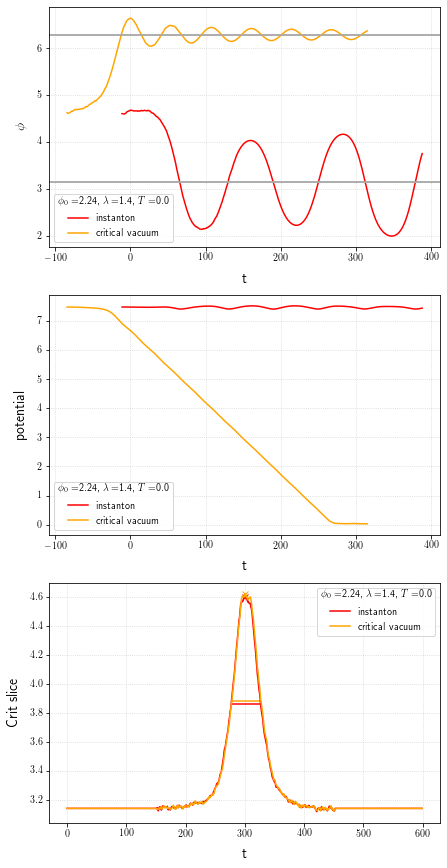

In [33]:
critSize = 30
colors = cycle(['r', 'orange', 'green', 'blue'])
labels = ['instanton', 'critical vacuum', 'average bubble']
fig, ax = plt.subplots(3, 1, figsize = (7, 15))
for ii, average_bubble in enumerate([subcritical2plot, critical2plot]):#, bubbleList[1][0,0]]):
    if ii == 2:
        indmin = int(indList[1])
    else:
        indmin = int(0)
    print(indmin, np.shape(average_bubble))
    col = next(colors)
    tmp = tmpLoaded[1]
    temp = tempList[tmp]
    lamb = lambList[tmp]

    bubble2plot = average_bubble[:400, 200:-200]
    slice = bubble2plot[indmin]
    potential = V(bubble2plot, lamb)

    nT,nN = np.shape(bubble2plot)
    xpeak = np.argmax(slice); print(xpeak)
    phiprof = bubble2plot[:,xpeak]
    tind = np.argmax(phiprof)

    labs = r'$\phi_0=$'+str('%.2f'%phi0)+r', $\lambda=$'+str(lamb)+r', $T=$'+str(temp)
    lsl = ('-' if tmp==1 else '--' if tmp==0 else '-.' if tmp==2 else ':')

    ax[0].set_ylabel(r'$\phi$')
    if ii!=2:
        ax[0].plot(np.arange(indmin, len(bubble2plot))-tind, phiprof, color=col, ls=lsl, label=labels[ii])
    else:
        ax[0].plot(np.arange(len(bubble2plot))-tind, phiprof, color=col, ls=lsl, label=labels[ii])
        ax[0].axvline(indmin-tind, ls=':', color='darkgray')
    ax[0].axhline(phieq, ls='-', color='darkgray')
    ax[0].axhline(2.*np.pi, ls='-', color='darkgray')

    potenprof = np.trapz(potential, dx=dx, axis=1)
    if ii!=2:
        ax[1].plot(np.arange(indmin, len(bubble2plot))-tind, potenprof, color=col, ls=lsl, label=labels[ii])
    else:
        ax[1].plot(np.arange(len(bubble2plot))-tind, potenprof, color=col, ls=lsl, label=labels[ii])
        ax[1].axvline(indmin-tind, ls=':', color='darkgray')
    ax[1].set_ylabel('potential')

    peaks, _ = find_peaks(slice, height=phieq+np.pi/3.)
    ind = np.argmax(slice[peaks[:]])
    fwhm = peak_widths(slice, peaks[[ind]], rel_height=0.5)
    RcritList[ii] = fwhm[0][0]/2.
    ax[2].plot(peaks[[ind]], slice[peaks[[ind]]], color=col, marker="x")
    ax[2].hlines(*fwhm[1:], color=col, ls=lsl)
    ax[2].plot(slice, color=col, ls=lsl, label=labels[ii])
    ax[2].set_ylabel('Crit slice')

    for aa, axx in enumerate(ax):
        axx.set_xlabel('t')
        axx.legend(title=labs)
        axx.grid(ls=':', color='darkgray', alpha=0.5)
plt.savefig('./data/comparisons_crit_slices.pdf')
plt.show()